# 442100110323

In [2]:
import pandas as pd

In [2]:
df_1 = pd.read_csv('processed/442100110323_clean.csv')

In [3]:
df_1.columns

Index(['ID', 'REF_NUMBER', 'LOCATION_CODE', 'SITE_CODE', 'METER_CODE',
       'PERIODE', 'READ_DATE', 'VOLTAGE_L1', 'VOLTAGE_L2', 'VOLTAGE_L3',
       'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'POWER_FACTOR_TOTAL',
       'ACTIVE_POWER_TOTAL', 'REACTIVE_POWER_TOTAL', 'KWH_EXPORT_TOTAL',
       'KWH_IMPORT_TOTAL', 'KVARH_EXPORT_TOTAL', 'KVARH_IMPORT_TOTAL',
       'INSERT_BY', 'INSERT_DATE', 'DATE_READ'],
      dtype='object')

In [4]:
# rumus KWH EXP =-((voltage A*current A)+(voltage A*current B)+(voltage A*current C))*power faktor*15/60
df_1['KWH_EXP'] = abs(((df_1['VOLTAGE_L1']*df_1['CURRENT_L1'])+(df_1['VOLTAGE_L1']*df_1['CURRENT_L2'])+(df_1['VOLTAGE_L1']*df_1['CURRENT_L3']))*df_1['POWER_FACTOR_TOTAL']*15/60)

# bandingkan KWH EXP dengan KWH EXP TOTAL
df_1[['KWH_EXP','KWH_EXPORT_TOTAL']]

,KWH_EXP,KWH_EXPORT_TOTAL
0,2.334143,2
1,2.344050,2
2,2.500311,2
3,2.432096,3
4,2.388465,2
...,...,...
166097,68.226236,69
166098,69.132420,69
166099,68.774401,70
166100,68.765215,69


In [5]:
df_1['KWH_EXP'].describe()

count    166102.000000
mean          9.352583
std           9.246701
min           0.000000
25%           2.323053
50%           7.081912
75%          13.781621
max          80.882348
Name: KWH_EXP, dtype: float64

<Axes: >

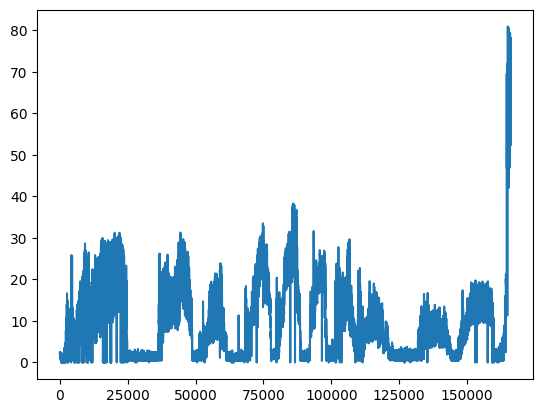

In [6]:
df_1['KWH_EXP'].plot()

KWH EXP di tahun 2024 ada lonjakan yang signifikan dibandingkan beberapa tahun sebelumnya

In [7]:
# cek kembali data tahun 2024
df_raw = pd.read_csv('processed/442100110323_clean.csv')
df_raw['READ_DATE'] = pd.to_datetime(df_raw['READ_DATE'])
df_2024 = df_raw[df_raw['READ_DATE'].dt.year == 2024]
df_2024

,ID,REF_NUMBER,LOCATION_CODE,SITE_CODE,METER_CODE,PERIODE,READ_DATE,VOLTAGE_L1,VOLTAGE_L2,VOLTAGE_L3,...,POWER_FACTOR_TOTAL,ACTIVE_POWER_TOTAL,REACTIVE_POWER_TOTAL,KWH_EXPORT_TOTAL,KWH_IMPORT_TOTAL,KVARH_EXPORT_TOTAL,KVARH_IMPORT_TOTAL,INSERT_BY,INSERT_DATE,DATE_READ
157601,46254683264,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:00:00,59.812664,60.018795,59.795486,...,-0.856934,61.262375,35.736385,15,0,10,0,HES,2024-02-02 01:03:49,20240101
157602,46254557948,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:15:00,59.692420,59.898552,59.675243,...,-0.845947,61.262375,37.438118,16,0,9,0,HES,2024-02-02 01:03:49,20240101
157603,46254558078,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:30:00,59.743954,59.915730,59.743954,...,-0.834961,61.262375,39.139850,16,0,10,0,HES,2024-02-02 01:03:49,20240101
157604,46253945119,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:45:00,59.829840,60.053150,59.864197,...,-0.834961,61.262375,39.139850,16,0,11,0,HES,2024-02-02 01:03:49,20240101
157605,46254794005,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 01:00:00,59.847020,60.104683,59.881374,...,-0.823975,61.262375,40.841583,15,0,10,0,HES,2024-02-02 01:03:49,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166097,51946309656,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 21:45:00,59.898552,60.001617,59.812664,...,-0.758057,272.277220,231.435640,69,0,58,0,HES,2024-08-10 02:59:31,20240531
166098,51946009618,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 22:00:00,59.932907,60.035973,59.847020,...,-0.758057,275.680700,234.839110,69,0,60,0,HES,2024-08-10 02:59:31,20240531
166099,51946301225,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 23:15:00,60.207752,60.327995,60.121860,...,-0.747070,277.382420,239.944300,70,0,61,0,HES,2024-08-10 02:59:32,20240531
166100,51946475985,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 23:30:00,60.259285,60.396706,60.190575,...,-0.747070,277.382420,239.944300,69,0,60,0,HES,2024-08-10 02:59:32,20240531


In [8]:
# buat dataframe baru yang hanya berisi READ_DATE dan KWH_EXP
df = df_1[['READ_DATE','KWH_EXP']]

# convert READ_DATE to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE',inplace=True)

df.to_csv('processed/442100110323_standard.csv')

/tmp/ipykernel_59045/1370718161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])


In [9]:
df

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,2.334143
2019-01-01 00:15:00,2.344050
2019-01-01 00:30:00,2.500311
2019-01-01 00:45:00,2.432096
2019-01-01 01:00:00,2.388465
...,...
2024-05-31 21:45:00,68.226236
2024-05-31 22:00:00,69.132420
2024-05-31 23:15:00,68.774401


### Resample Hourly, Daily, Weekly, Monthly

Mencari pola tren dan seasonality dari data di timeframe yang berbeda

<Axes: xlabel='READ_DATE'>

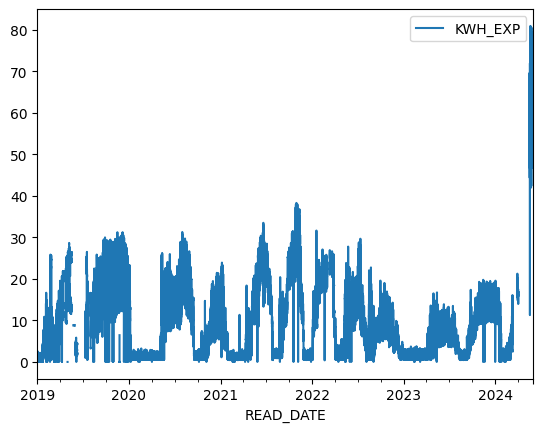

In [10]:
# ada pencatatan yang tidak kerecord, normalnya dia per 15 menit jadi harusnya ada 4 data per jam. Tapi ada yang 3 data per jam bahkan tidak ada data sama sekali
# contoh : 2019-01-11 20.00.00, 2019-01-11 22.15.00, 2019-01-11 23.00.00
# mari isi kelenngkapan data yang hilang dengan nilai NaN untuk setiap fiturnya. Sehingga normal jadi 2019-01-11 20.00.00, 2019-01-11 20.15.00, 2019-01-11 20.30.00, 2019-01-11 20.45.00
df = df.resample('15min').mean()
df.plot()

/tmp/ipykernel_59045/1231241643.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


<Axes: xlabel='READ_DATE'>

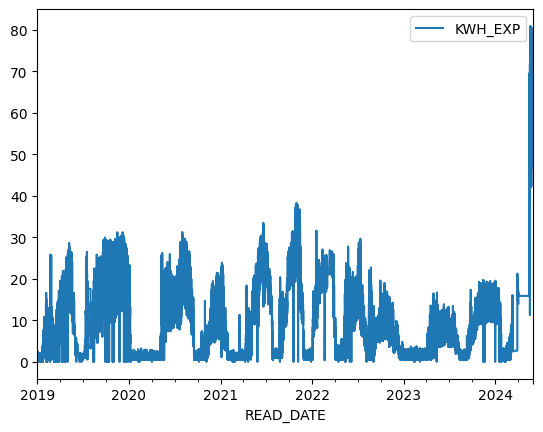

In [11]:
# fillna untuk mengisi nilai NaN
df.fillna(method='ffill',inplace=True)
# df.interpolate(method='linear',inplace=True)
df.plot()

In [12]:
df.to_csv('processed/442100110323_standard.csv')

<Axes: xlabel='READ_DATE'>

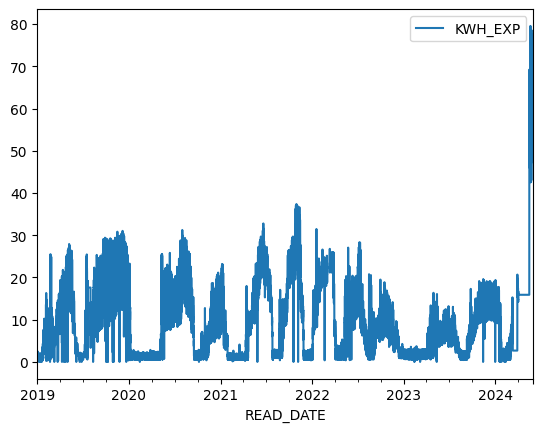

In [147]:
# resample menjadi 1 jam dan hitung rata-rata
df_hourly = df.resample('1h').mean()
df_hourly.to_csv('processed/442100110323_hourly.csv')
df_hourly.plot()

In [165]:
df_hourly

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,2.402650
2019-01-01 01:00:00,2.408348
2019-01-01 02:00:00,2.406840
2019-01-01 03:00:00,2.256511
2019-01-01 04:00:00,2.065598
...,...
2024-05-31 19:00:00,65.205495
2024-05-31 20:00:00,65.520523
2024-05-31 21:00:00,66.389436


<Axes: xlabel='READ_DATE'>

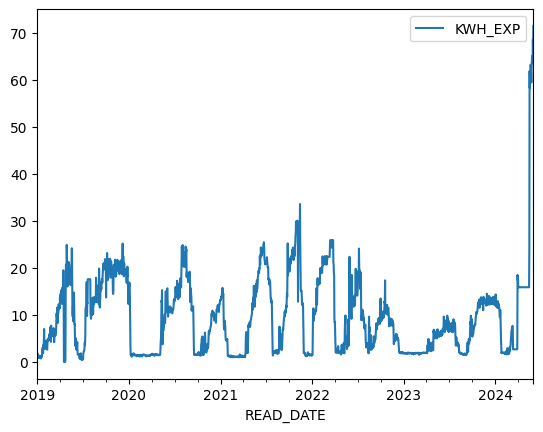

In [148]:
# resample menjadi 1 hari dan hitung rata-rata
df_daily = df_hourly.resample('1D').mean()
df_daily.to_csv('processed/442100110323_daily.csv')
df_daily.plot()

<Axes: xlabel='READ_DATE'>

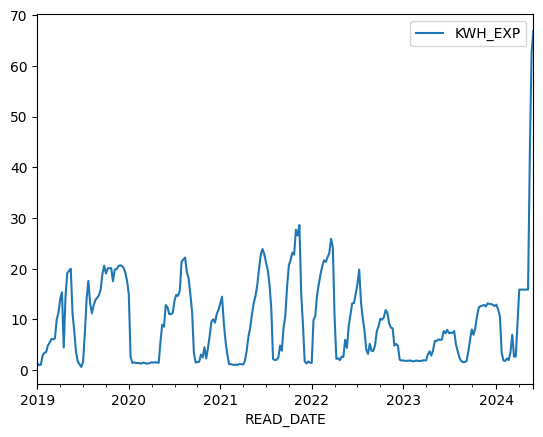

In [149]:
# resample menjadi 1 minggu dan hitung rata-rata
df_weekly = df_daily.resample('1W').mean()
df_weekly.to_csv('processed/442100110323_weekly.csv')
df_weekly.plot()

/tmp/ipykernel_1526/1170976162.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_weekly.resample('1M').mean()


<Axes: xlabel='READ_DATE'>

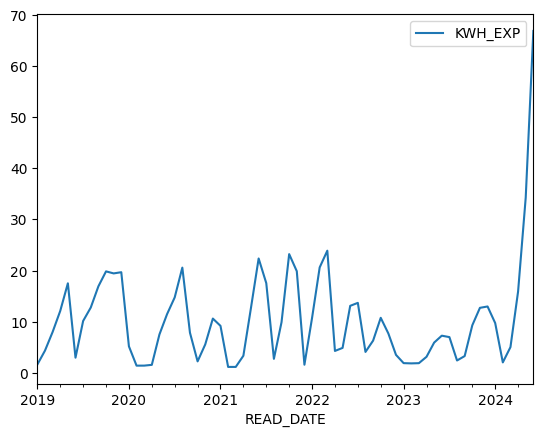

In [150]:
# resample menjadi 1 bulan dan hitung rata-rata
df_monthly = df_weekly.resample('1M').mean()
df_monthly.to_csv('processed/442100110323_monthly.csv')
df_monthly.plot()

### Climate Data

In [151]:
df_2019 = pd.read_excel('raw/2019.xlsx')
df_2020 = pd.read_excel('raw/2020.xlsx')
df_2021 = pd.read_excel('raw/2021.xlsx')
df_2022 = pd.read_excel('raw/2022.xlsx')
df_2023 = pd.read_excel('raw/2023.xlsx')
df_2024 = pd.read_excel('raw/2024.xlsx')

In [152]:
df_2019['Tanggal'] = pd.to_datetime(df_2019['Tanggal'], dayfirst=True)
df_2020['Tanggal'] = pd.to_datetime(df_2020['Tanggal'], dayfirst=True)
df_2021['Tanggal'] = pd.to_datetime(df_2021['Tanggal'], dayfirst=True)
df_2022['Tanggal'] = pd.to_datetime(df_2022['Tanggal'], dayfirst=True)
df_2023['Tanggal'] = pd.to_datetime(df_2023['Tanggal'], dayfirst=True)
df_2024['Tanggal'] = pd.to_datetime(df_2024['Tanggal'], dayfirst=True)
print(df_2019['Tanggal'].dtype, df_2020['Tanggal'].dtype, df_2021['Tanggal'].dtype, df_2022['Tanggal'].dtype, df_2023['Tanggal'].dtype, df_2024['Tanggal'].dtype)

datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns]


In [153]:
# merge data 2019-2024 menjadi satu dataframe
relevant_columns = ['Tanggal', 'Tavg', 'RH_avg', 'RR', 'ss']
df_all = pd.concat([df_2019[relevant_columns], df_2020[relevant_columns], df_2021[relevant_columns], df_2022[relevant_columns], df_2023[relevant_columns], df_2024[relevant_columns]])
df_all['Tanggal'] = pd.to_datetime(df_all['Tanggal'])
df_all.reset_index(drop=True, inplace=True)
df_all.tail(10)

,Tanggal,Tavg,RH_avg,RR,ss
1998,2024-06-21,27.0,67.0,0.0,10.4
1999,2024-06-22,28.1,66.0,0.0,10.3
2000,2024-06-23,27.7,70.0,0.0,10.2
2001,2024-06-24,26.7,77.0,0.0,6.4
2002,2024-06-25,27.3,74.0,0.8,4.2
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0
2007,2024-06-30,28.7,66.0,0.0,8.3


* Tavg: Temperatur rata-rata (°C)
* RH_avg: Kelembapan rata-rata (%)
* RR: Curah hujan (mm)
* ss: Lamanya penyinaran matahari (jam)

* 8888: data tidak terukur
* 9999: Tidak Ada Data (tidak dilakukan pengukuran)


In [154]:
df_all.isna().sum()

Tanggal     0
Tavg       10
RH_avg     10
RR         12
ss         20
dtype: int64

In [155]:
# cek apakah ada data dengan nilai 8888 = data tidak terukur dan 9999 = data tidak ada (missing data) pada semua kolom
# kemudian ganti nilai 8888 dan 9999 dengan NaN
df_all = df_all.replace(8888, None)
df_all = df_all.replace(9999, None)

df_all.isna().sum()

Tanggal      0
Tavg        10
RH_avg      10
RR         132
ss          20
dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

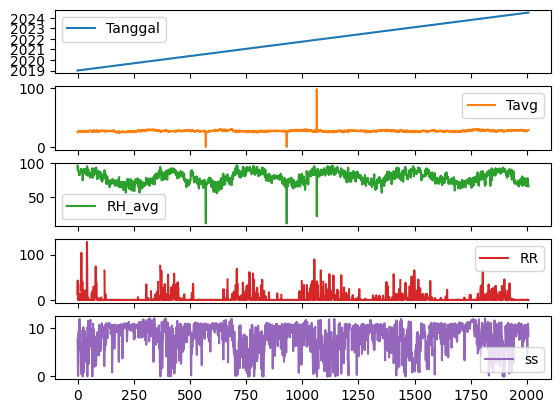

In [156]:
# plot feature di data 2019-2024 untuk melihat distribusi data
df_all.plot(subplots=True)

Ada beberapa cuaca ekstrem di Data

/root/miniconda3/envs/pbl/lib/python3.12/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/root/miniconda3/envs/pbl/lib/python3.12/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

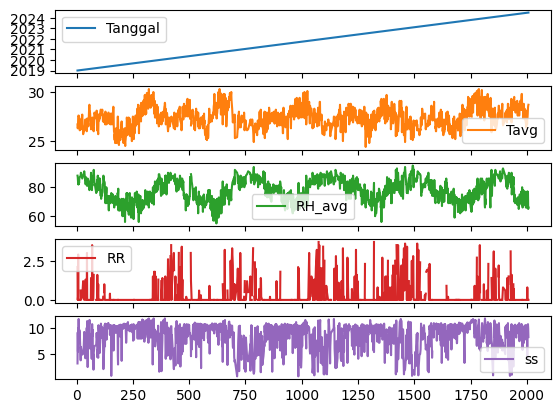

In [157]:
# cek outlier data 2019-2024 lalu jadikan dataframe baru khusus yang outlier dengan IQR
Q1 = df_all.quantile(0.25)
Q3 = df_all.quantile(0.75)
IQR = Q3 - Q1

# cek outlier
outlier = (df_all < (Q1 - 1.5 * IQR)) | (df_all > (Q3 + 1.5 * IQR))

# remove outlier
df_all_no_outlier = df_all[~outlier.any(axis=1)]
df_all_no_outlier.plot(subplots=True)


In [158]:
df_all_no_outlier.to_csv('processed/weather_2019_2024_no_outlier.csv')

cek nilai dari outlier nya

In [159]:
print(df_all[outlier['Tavg']])

print(df_all['Tavg'].describe())

        Tanggal  Tavg  RH_avg   RR    ss
179  2019-06-29  24.3    66.0  0.0  10.5
187  2019-07-07  23.6    66.0  0.0  10.6
571  2020-07-25   0.0    10.7  NaN   NaN
685  2020-11-16  30.4    68.0  0.0   9.0
686  2020-11-17  30.8    67.0  0.0  11.8
931  2021-07-20   0.0    10.6  NaN   NaN
1013 2021-10-10  30.5    60.0  0.0  10.5
1065 2021-12-01  99.0    21.1  2.7   NaN
1762 2023-10-29  30.5    66.0  0.0  11.5
1785 2023-11-21  30.9    69.0  0.0  10.0
1786 2023-11-22  30.8    66.0  0.0  11.2
count    1998.000000
mean       27.392643
std         2.121981
min         0.000000
25%        26.600000
50%        27.400000
75%        28.100000
max        99.000000
Name: Tavg, dtype: float64


Nilai rata-rata suhu yang bernilai 0 dan 99 tidak valid. Karena tidak mungkin. Kita bisa ubah nilai ini menjadi rata-rata suhu agar lebih masuk akal

In [160]:
print(df_all[outlier['RH_avg']])

print(df_all['RH_avg'].describe())

        Tanggal  Tavg  RH_avg   RR  ss
571  2020-07-25   0.0    10.7  NaN NaN
931  2021-07-20   0.0    10.6  NaN NaN
1065 2021-12-01  99.0    21.1  2.7 NaN
count    1998.000000
mean       78.180881
std         8.414145
min        10.600000
25%        72.000000
50%        78.000000
75%        85.000000
max        96.000000
Name: RH_avg, dtype: float64


In [161]:
print(df_all[outlier['RR']])

print(df_all['RR'].mean())

        Tanggal  Tavg  RH_avg    RR    ss
0    2019-01-01  25.7    96.0  12.9   7.5
1    2019-01-02  25.9    90.0  42.7   6.7
3    2019-01-04  25.8    88.0  34.6   0.1
13   2019-01-14  26.3    86.0  12.8   9.5
15   2019-01-16  25.6    91.0  34.8   5.6
...         ...   ...     ...   ...   ...
1915 2024-03-30  29.2    80.0  20.0   7.1
1921 2024-04-05  28.6    86.0  11.9   0.6
1922 2024-04-06  27.2    90.0   6.5   3.3
1923 2024-04-07  28.3    88.0  36.5   4.2
1924 2024-04-08  27.8    90.0  17.0  10.7

[362 rows x 5 columns]
3.972068230277185


In [162]:
print(df_all[outlier['ss']])

print(df_all['ss'].describe())

        Tanggal  Tavg  RH_avg     RR   ss
2    2019-01-03  24.9    94.0    0.5  0.1
3    2019-01-04  25.8    88.0   34.6  0.1
17   2019-01-18  26.0    90.0  104.0  0.5
22   2019-01-23  26.4    86.0   37.6  0.5
23   2019-01-24  27.4    74.0    0.2  0.0
44   2019-02-14  26.5    86.0   12.0  0.0
66   2019-03-08  26.6    83.0   18.4  0.0
369  2020-01-05  27.3    88.0   39.8  0.0
405  2020-02-10  26.9    86.0    2.1  0.0
416  2020-02-21  26.7    91.0   27.5  0.0
431  2020-03-07  26.2    91.0    4.8  0.6
505  2020-05-20  26.7    86.0    0.8  0.4
506  2020-05-21  27.4    81.0    1.2  0.2
701  2020-12-02  26.6    87.0    1.8  0.2
706  2020-12-07  26.8    89.0    5.2  0.1
710  2020-12-11  27.4    90.0   14.7  0.4
712  2020-12-13  25.7    94.0   35.5  0.4
756  2021-01-26  26.3    88.0    4.6  0.6
759  2021-01-29  26.8    89.0   16.3  0.0
760  2021-01-30  25.8    91.0   18.5  0.0
761  2021-01-31  25.9    90.0    7.0  0.0
765  2021-02-04  26.3    88.0   61.2  0.0
786  2021-02-25  26.3    95.0   43

Fitur RH_Avg, RR, Ss bisa dianggap normal sebagai kejadian alamiah

/tmp/ipykernel_1526/2818428061.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_all = df_all.interpolate(method='linear')


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

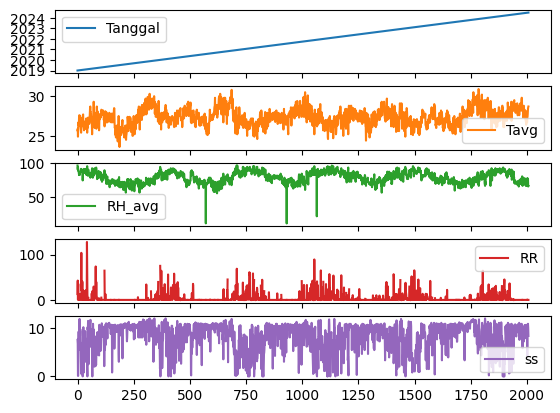

In [163]:
# ubah nilai 0 dan 99 di kolom Tavg menjadi mean
df_all['Tavg'] = df_all['Tavg'].replace(0, df_all['Tavg'].mean())
df_all['Tavg'] = df_all['Tavg'].replace(99, df_all['Tavg'].mean())

# fillna dengan metode interpolate linear
df_all = df_all.interpolate(method='linear')
df_all.plot(subplots=True)

In [164]:
print(df_all.shape, df_daily.shape)
df_all.to_csv('processed/weather_2019_2024_standard.csv')

(2008, 5) (1978, 1)


# 442300170322

In [1]:
import pandas as pd

In [61]:
df_2 = pd.read_csv('processed/442300170322_clean.csv')

In [62]:
df_2.columns

Index(['ID', 'REF_NUMBER', 'LOCATION_CODE', 'SITE_CODE', 'METER_CODE',
       'PERIODE', 'READ_DATE', 'VOLTAGE_L1', 'VOLTAGE_L2', 'VOLTAGE_L3',
       'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'POWER_FACTOR_TOTAL',
       'ACTIVE_POWER_TOTAL', 'REACTIVE_POWER_TOTAL', 'KWH_EXPORT_TOTAL',
       'KWH_IMPORT_TOTAL', 'KVARH_EXPORT_TOTAL', 'KVARH_IMPORT_TOTAL',
       'INSERT_BY', 'INSERT_DATE', 'DATE_READ'],
      dtype='object')

In [63]:
# rumus KWH EXP =-((voltage A*current A)+(voltage A*current B)+(voltage A*current C))*power faktor*15/60
df_2['KWH_EXP'] = abs(((df_2['VOLTAGE_L1']*df_2['CURRENT_L1'])+(df_2['VOLTAGE_L1']*df_2['CURRENT_L2'])+(df_2['VOLTAGE_L1']*df_2['CURRENT_L3']))*df_2['POWER_FACTOR_TOTAL']*15/60)

# bandingkan KWH EXP dengan KWH EXP TOTAL
df_2[['KWH_EXP','KWH_EXPORT_TOTAL']]

,KWH_EXP,KWH_EXPORT_TOTAL
0,0.000000,1.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,8.821635,9.000000
4,12.330286,12.000000
...,...,...
159000,2.514534,2.485056
159001,2.528889,2.498496
159002,2.587244,2.557632
159003,2.478661,2.448768


In [64]:
df_2['KWH_EXP'].describe()

count    159005.000000
mean         28.396017
std          22.005747
min           0.000000
25%           7.216278
50%          27.936273
75%          42.550046
max         112.500735
Name: KWH_EXP, dtype: float64

<Axes: >

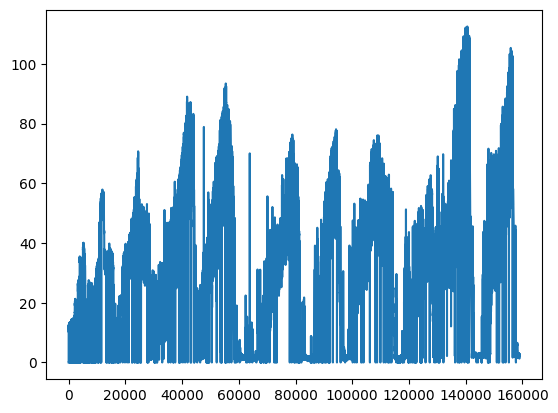

In [65]:
df_2['KWH_EXP'].plot()

In [66]:
# cek kembali data tahun 2024
df_raw = pd.read_csv('processed/442300170322_clean.csv')
df_raw['READ_DATE'] = pd.to_datetime(df_raw['READ_DATE'])
df_2024 = df_raw[df_raw['READ_DATE'].dt.year == 2024]
df_2024

,ID,REF_NUMBER,LOCATION_CODE,SITE_CODE,METER_CODE,PERIODE,READ_DATE,VOLTAGE_L1,VOLTAGE_L2,VOLTAGE_L3,...,POWER_FACTOR_TOTAL,ACTIVE_POWER_TOTAL,REACTIVE_POWER_TOTAL,KWH_EXPORT_TOTAL,KWH_IMPORT_TOTAL,KVARH_EXPORT_TOTAL,KVARH_IMPORT_TOTAL,INSERT_BY,INSERT_DATE,DATE_READ
144893,45077181566,2d40417a567e144910dd804eb8e7d155,442300170322,44230,251983447,202401,2024-01-01 00:00:00,54.532906,53.584454,54.130370,...,0.706206,0.0,0.0,2.487744,0.0,2.304960,0.0,HES,2024-01-02 05:45:17,20240101
144894,45077181189,2d40417a567e144910dd804eb8e7d155,442300170322,44230,251983447,202401,2024-01-01 00:15:00,54.405457,53.499710,54.039303,...,0.702435,0.0,0.0,2.400384,0.0,2.247168,0.0,HES,2024-01-02 05:45:17,20240101
144895,45077181749,2d40417a567e144910dd804eb8e7d155,442300170322,44230,251983447,202401,2024-01-01 00:30:00,54.299957,53.428486,53.957058,...,0.697169,0.0,0.0,2.307648,0.0,2.198784,0.0,HES,2024-01-02 05:45:17,20240101
144896,45077181353,2d40417a567e144910dd804eb8e7d155,442300170322,44230,251983447,202401,2024-01-01 00:45:00,54.360190,53.461430,54.002050,...,0.708874,0.0,0.0,2.432640,0.0,2.233728,0.0,HES,2024-01-02 05:45:17,20240101
144897,45077181035,2d40417a567e144910dd804eb8e7d155,442300170322,44230,251983447,202401,2024-01-01 01:00:00,54.582950,53.695763,54.212402,...,0.682303,0.0,0.0,2.353344,0.0,2.331840,0.0,HES,2024-01-02 05:45:17,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159000,51959341675,74E098DC64A77973A076F806DEFD3117,442300170322,44230,251983447,202405,2024-05-31 22:45:00,55.274395,54.673515,54.032030,...,0.652724,0.0,0.0,2.485056,0.0,2.663808,0.0,HES,2024-08-10 04:24:53,20240531
159001,51959342521,74E098DC64A77973A076F806DEFD3117,442300170322,44230,251983447,202405,2024-05-31 23:00:00,55.379856,54.741610,54.127567,...,0.650036,0.0,0.0,2.498496,0.0,2.696064,0.0,HES,2024-08-10 04:24:53,20240531
159002,51959346972,74E098DC64A77973A076F806DEFD3117,442300170322,44230,251983447,202405,2024-05-31 23:15:00,55.486717,54.858276,54.247870,...,0.656840,0.0,0.0,2.557632,0.0,2.728320,0.0,HES,2024-08-10 04:24:53,20240531
159003,51959346712,74E098DC64A77973A076F806DEFD3117,442300170322,44230,251983447,202405,2024-05-31 23:30:00,55.644295,55.016170,54.397903,...,0.628064,0.0,0.0,2.448768,0.0,2.795520,0.0,HES,2024-08-10 04:24:53,20240531


In [67]:
# buat dataframe baru yang hanya berisi READ_DATE dan KWH_EXP
df = df_2[['READ_DATE','KWH_EXP']]

# convert READ_DATE to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE',inplace=True)

df.to_csv('processed/442300170322_standard.csv')

/tmp/ipykernel_3361/754544461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])


### Resample Hourly

<Axes: xlabel='READ_DATE'>

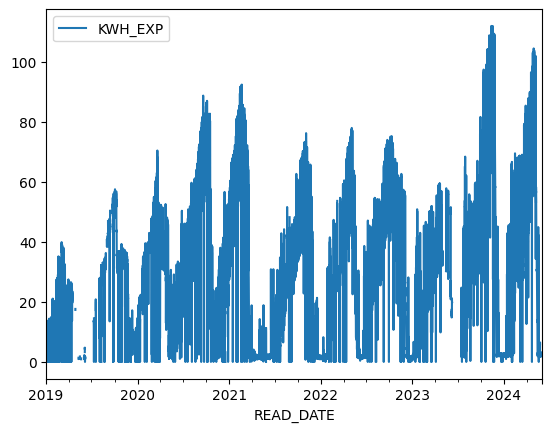

In [68]:
# resample menjadi 1 jam dan hitung rata-rata
df_hourly = df.resample('1h').mean()
df_hourly.plot()

/tmp/ipykernel_3361/4147513671.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill',inplace=True)


<Axes: xlabel='READ_DATE'>

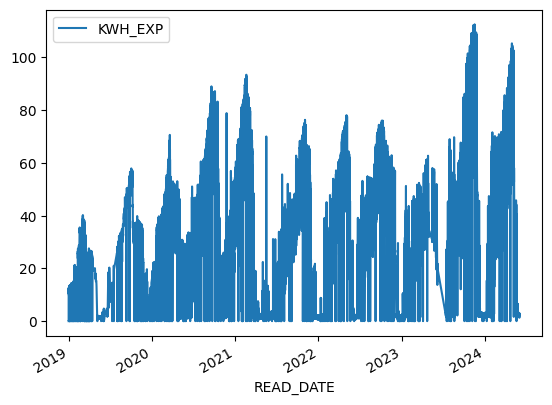

In [69]:
# fillna untuk mengisi nilai NaN
df_hourly.fillna(method='ffill',inplace=True)
# df.interpolate(method='linear',inplace=True)
df_hourly.to_csv('processed/442300170322_hourly.csv')
df.plot()

In [70]:
df_hourly

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,2.205409
2019-01-01 01:00:00,12.355435
2019-01-01 02:00:00,12.322026
2019-01-01 03:00:00,12.279012
2019-01-01 04:00:00,12.228156
...,...
2024-05-31 19:00:00,2.731852
2024-05-31 20:00:00,2.705614
2024-05-31 21:00:00,2.668743


<Axes: xlabel='READ_DATE'>

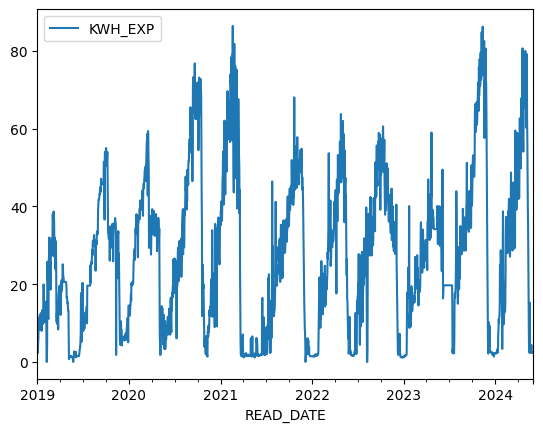

In [71]:
# resample menjadi 1 jam dan hitung rata-rata
df_daily = df_hourly.resample('1D').mean()
df_daily.to_csv('processed/442300170322_daily.csv')
df_daily.plot()

# 442100118673

In [19]:
df_3 = pd.read_csv('processed/442100118673_clean.csv')

In [20]:
df_3.shape

(152959, 23)

In [21]:
df_3.columns

Index(['ID', 'REF_NUMBER', 'LOCATION_CODE', 'SITE_CODE', 'METER_CODE',
       'PERIODE', 'READ_DATE', 'VOLTAGE_L1', 'VOLTAGE_L2', 'VOLTAGE_L3',
       'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'POWER_FACTOR_TOTAL',
       'ACTIVE_POWER_TOTAL', 'REACTIVE_POWER_TOTAL', 'KWH_EXPORT_TOTAL',
       'KWH_IMPORT_TOTAL', 'KVARH_EXPORT_TOTAL', 'KVARH_IMPORT_TOTAL',
       'INSERT_BY', 'INSERT_DATE', 'DATE_READ'],
      dtype='object')

In [22]:
# rumus KWH EXP =-((voltage A*current A)+(voltage A*current B)+(voltage A*current C))*power faktor*15/60
df_3['KWH_EXP'] = abs(((df_3['VOLTAGE_L1']*df_3['CURRENT_L1'])+(df_3['VOLTAGE_L1']*df_3['CURRENT_L2'])+(df_3['VOLTAGE_L1']*df_3['CURRENT_L3']))*df_3['POWER_FACTOR_TOTAL']*15/60)

# bandingkan KWH EXP dengan KWH EXP TOTAL
df_3[['KWH_EXP','KWH_EXPORT_TOTAL']]

,KWH_EXP,KWH_EXPORT_TOTAL
0,81.977581,82
1,81.930951,82
2,81.812026,82
3,81.589133,82
4,81.513441,82
...,...,...
152954,111.617205,113
152955,112.218318,114
152956,112.204102,113
152957,112.425817,114


In [23]:
df_3['KWH_EXP'].describe()

count    152959.000000
mean         55.703667
std          34.442958
min           0.000000
25%          27.791167
50%          54.541412
75%          79.282228
max         174.215340
Name: KWH_EXP, dtype: float64

<Axes: >

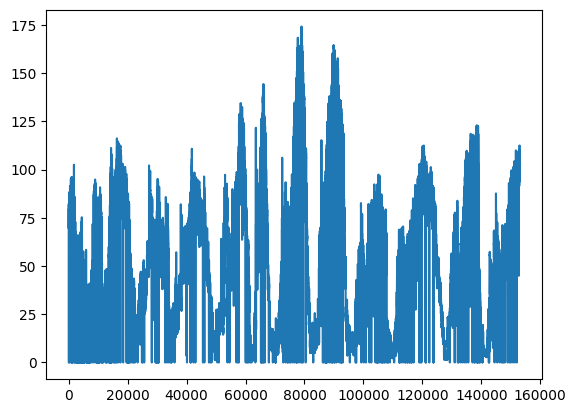

In [24]:
df_3['KWH_EXP'].plot()

In [25]:
# cek kembali data tahun 2024
df_raw = pd.read_csv('processed/442100118673_clean.csv')
df_raw['READ_DATE'] = pd.to_datetime(df_raw['READ_DATE'])
df_2024 = df_raw[df_raw['READ_DATE'].dt.year == 2024]
df_2024

,ID,REF_NUMBER,LOCATION_CODE,SITE_CODE,METER_CODE,PERIODE,READ_DATE,VOLTAGE_L1,VOLTAGE_L2,VOLTAGE_L3,...,POWER_FACTOR_TOTAL,ACTIVE_POWER_TOTAL,REACTIVE_POWER_TOTAL,KWH_EXPORT_TOTAL,KWH_IMPORT_TOTAL,KVARH_EXPORT_TOTAL,KVARH_IMPORT_TOTAL,INSERT_BY,INSERT_DATE,DATE_READ
138984,46273521848,53B3337B5F3D580B64BB2C8AF47CD0E3,442100118673,44210,251548841,202401,2024-01-04 14:15:00,59.228622,59.451930,59.262978,...,-0.944824,183.78712,62.964108,46,0,16,0,HES,2024-02-04 03:23:40,20240104
138985,46273521865,53B3337B5F3D580B64BB2C8AF47CD0E3,442100118673,44210,251548841,202401,2024-01-04 14:30:00,59.314510,59.469112,59.280155,...,-0.933838,185.48886,66.367570,47,0,17,0,HES,2024-02-04 03:23:40,20240104
138986,46273538369,53B3337B5F3D580B64BB2C8AF47CD0E3,442100118673,44210,251548841,202401,2024-01-04 14:45:00,59.314510,59.555000,59.348866,...,-0.933838,185.48886,64.665840,47,0,17,0,HES,2024-02-04 03:23:40,20240104
138987,46273521866,53B3337B5F3D580B64BB2C8AF47CD0E3,442100118673,44210,251548841,202401,2024-01-04 15:00:00,59.348866,59.589355,59.383220,...,-0.944824,193.99753,61.262375,49,0,15,0,HES,2024-02-04 03:23:40,20240104
138988,46273538791,53B3337B5F3D580B64BB2C8AF47CD0E3,442100118673,44210,251548841,202401,2024-01-04 15:15:00,59.417576,59.675243,59.451930,...,-0.944824,192.29579,61.262375,48,0,16,0,HES,2024-02-04 03:23:40,20240104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152954,51946042183,A660EE28F6D1B3FD70AEE671D3425B6F,442100118673,44210,251548841,202405,2024-05-31 22:45:00,59.743954,60.053150,59.932907,...,-0.911865,450.95914,188.892320,113,0,47,0,HES,2024-08-10 02:59:37,20240531
152955,51946042184,A660EE28F6D1B3FD70AEE671D3425B6F,442100118673,44210,251548841,202405,2024-05-31 23:00:00,59.795486,60.104683,59.967262,...,-0.911865,452.66090,190.594060,114,0,49,0,HES,2024-08-10 02:59:37,20240531
152956,51946473087,A660EE28F6D1B3FD70AEE671D3425B6F,442100118673,44210,251548841,202405,2024-05-31 23:15:00,59.881374,60.190575,60.053150,...,-0.911865,452.66090,190.594060,113,0,48,0,HES,2024-08-10 02:59:38,20240531
152957,51946018583,A660EE28F6D1B3FD70AEE671D3425B6F,442100118673,44210,251548841,202405,2024-05-31 23:30:00,59.950085,60.259285,60.121860,...,-0.911865,454.36260,190.594060,114,0,48,0,HES,2024-08-10 02:59:38,20240531


In [26]:
# buat dataframe baru yang hanya berisi READ_DATE dan KWH_EXP
df = df_3[['READ_DATE','KWH_EXP']]

# convert READ_DATE to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE',inplace=True)

df.to_csv('processed/442100118673_standard.csv')

/tmp/ipykernel_3361/1861106875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])


### Resample Hourly

<Axes: xlabel='READ_DATE'>

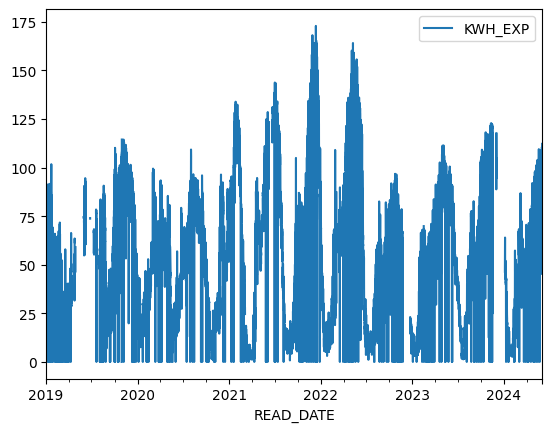

In [27]:
# resample menjadi 1 jam dan hitung rata-rata
df_hourly = df.resample('1h').mean()
df_hourly.plot()

/tmp/ipykernel_3361/467037125.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill',inplace=True)


<Axes: xlabel='READ_DATE'>

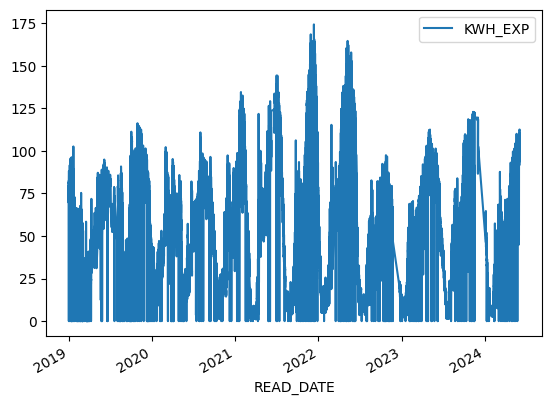

In [28]:
# fillna untuk mengisi nilai NaN
df_hourly.fillna(method='ffill',inplace=True)
# df.interpolate(method='linear',inplace=True)
df_hourly.to_csv('processed/442100118673_hourly.csv')
df.plot()

In [29]:
df_hourly

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,81.827423
2019-01-01 01:00:00,81.335048
2019-01-01 02:00:00,81.252447
2019-01-01 03:00:00,81.323956
2019-01-01 04:00:00,81.340817
...,...
2024-05-31 19:00:00,108.370055
2024-05-31 20:00:00,109.709303
2024-05-31 21:00:00,110.409656


<Axes: xlabel='READ_DATE'>

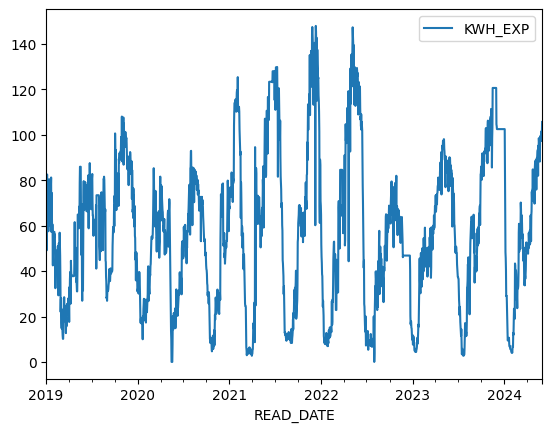

In [30]:
# resample menjadi 1 jam dan hitung rata-rata
df_daily = df_hourly.resample('1D').mean()
df_daily.to_csv('processed/442100118673_daily.csv')
df_daily.plot()

# 442300169800

In [31]:
df_4 = pd.read_csv('processed/442300169800_clean.csv')

In [32]:
df_4.shape

(123779, 23)

In [33]:
df_4.columns

Index(['ID', 'REF_NUMBER', 'LOCATION_CODE', 'SITE_CODE', 'METER_CODE',
       'PERIODE', 'READ_DATE', 'VOLTAGE_L1', 'VOLTAGE_L2', 'VOLTAGE_L3',
       'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'POWER_FACTOR_TOTAL',
       'ACTIVE_POWER_TOTAL', 'REACTIVE_POWER_TOTAL', 'KWH_EXPORT_TOTAL',
       'KWH_IMPORT_TOTAL', 'KVARH_EXPORT_TOTAL', 'KVARH_IMPORT_TOTAL',
       'INSERT_BY', 'INSERT_DATE', 'DATE_READ'],
      dtype='object')

In [34]:
# rumus KWH EXP =-((voltage A*current A)+(voltage A*current B)+(voltage A*current C))*power faktor*15/60
df_4['KWH_EXP'] = abs(((df_4['VOLTAGE_L1']*df_4['CURRENT_L1'])+(df_4['VOLTAGE_L1']*df_4['CURRENT_L2'])+(df_4['VOLTAGE_L1']*df_4['CURRENT_L3']))*df_4['POWER_FACTOR_TOTAL']*15/60)

# bandingkan KWH EXP dengan KWH EXP TOTAL
df_4[['KWH_EXP','KWH_EXPORT_TOTAL']]

,KWH_EXP,KWH_EXPORT_TOTAL
0,4.860817,5
1,4.859837,5
2,4.858406,4
3,4.861268,5
4,4.859837,5
...,...,...
123774,9.952567,9
123775,9.921494,10
123776,9.935582,10
123777,9.944036,10


In [35]:
df_4['KWH_EXP'].describe()

count    123779.000000
mean          4.771171
std           3.348623
min           0.000000
25%           1.121827
50%           5.258468
75%           7.374362
max          18.668710
Name: KWH_EXP, dtype: float64

<Axes: >

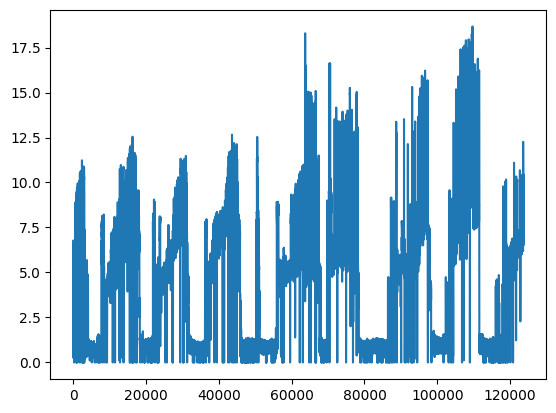

In [36]:
df_4['KWH_EXP'].plot()

In [56]:
# cek kembali data tahun 2024
df_raw = pd.read_csv('processed/442300169800_clean.csv')
df_raw['READ_DATE'] = pd.to_datetime(df_raw['READ_DATE'])
df_2024 = df_raw[df_raw['READ_DATE'].dt.year == 2024]
df_2024

,ID,REF_NUMBER,LOCATION_CODE,SITE_CODE,METER_CODE,PERIODE,READ_DATE,VOLTAGE_L1,VOLTAGE_L2,VOLTAGE_L3,...,POWER_FACTOR_TOTAL,ACTIVE_POWER_TOTAL,REACTIVE_POWER_TOTAL,KWH_EXPORT_TOTAL,KWH_IMPORT_TOTAL,KVARH_EXPORT_TOTAL,KVARH_IMPORT_TOTAL,INSERT_BY,INSERT_DATE,DATE_READ
112275,47245879825,BE9968568D87EDBD88912462B44F24BF,442300169800,44230,218172240,202401,2024-01-01 00:00:00,60.413883,60.808968,60.585660,...,-0.889893,3.403465,1.701733,1,0,1,0,HES,2024-03-08 21:44:55,20240101
112276,47245587243,BE9968568D87EDBD88912462B44F24BF,442300169800,44230,218172240,202401,2024-01-01 00:15:00,60.190575,60.551304,60.345173,...,-0.889893,3.403465,1.701733,2,0,1,0,HES,2024-03-08 21:45:34,20240101
112277,47245068038,BE9968568D87EDBD88912462B44F24BF,442300169800,44230,218172240,202401,2024-01-01 00:30:00,60.139038,60.482594,60.276463,...,-0.889893,3.403465,1.701733,1,0,1,0,HES,2024-03-08 21:45:34,20240101
112278,47245868712,BE9968568D87EDBD88912462B44F24BF,442300169800,44230,218172240,202401,2024-01-01 00:45:00,60.173397,60.516950,60.310818,...,-0.889893,3.403465,1.701733,1,0,0,0,HES,2024-03-08 21:45:34,20240101
112279,47245865047,BE9968568D87EDBD88912462B44F24BF,442300169800,44230,218172240,202401,2024-01-01 01:00:00,60.207752,60.568480,60.362350,...,-0.889893,3.403465,1.701733,1,0,1,0,HES,2024-03-08 21:45:34,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123774,51996658527,BF94BE53A5F399C8F96042D01DADDB78,442300169800,44230,218172240,202405,2024-05-31 22:45:00,60.465416,60.551304,60.431060,...,0.988770,37.438118,-3.403465,9,0,1,1,HES,2024-08-10 04:25:10,20240531
123775,51996658528,BF94BE53A5F399C8F96042D01DADDB78,442300169800,44230,218172240,202405,2024-05-31 23:00:00,60.482594,60.585660,60.448240,...,0.988770,37.438118,-3.403465,10,0,0,1,HES,2024-08-10 04:25:10,20240531
123776,51959364194,BF94BE53A5F399C8F96042D01DADDB78,442300169800,44230,218172240,202405,2024-05-31 23:15:00,60.568480,60.671547,60.551304,...,0.988770,37.438118,-3.403465,10,0,0,0,HES,2024-08-10 04:25:11,20240531
123777,51959364195,BF94BE53A5F399C8F96042D01DADDB78,442300169800,44230,218172240,202405,2024-05-31 23:30:00,60.620014,60.740257,60.620014,...,0.988770,37.438118,-3.403465,10,0,0,1,HES,2024-08-10 04:25:11,20240531


In [57]:
# buat dataframe baru yang hanya berisi READ_DATE dan KWH_EXP
df = df_4[['READ_DATE','KWH_EXP']]

# convert READ_DATE to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE',inplace=True)

df.to_csv('processed/442300170322_standard.csv')

/tmp/ipykernel_3361/3792562299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])


### Resample Hourly

<Axes: xlabel='READ_DATE'>

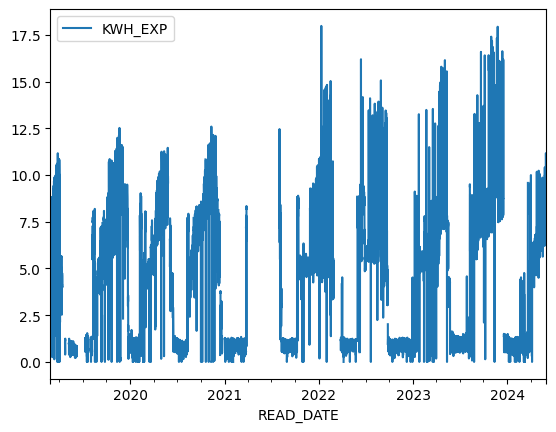

In [58]:
# resample menjadi 1 jam dan hitung rata-rata
df_hourly = df.resample('1h').mean()
df_hourly.plot()

/tmp/ipykernel_3361/1980947971.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill',inplace=True)


<Axes: xlabel='READ_DATE'>

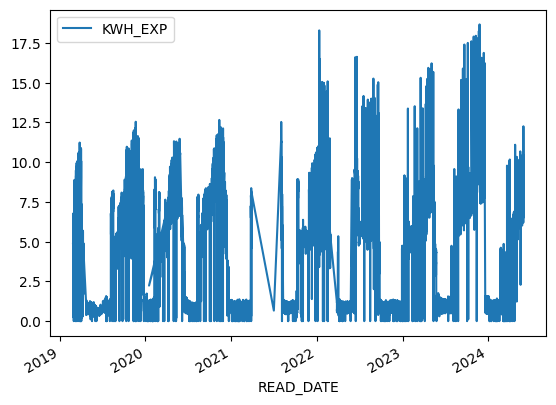

In [59]:
# fillna untuk mengisi nilai NaN
df_hourly.fillna(method='ffill',inplace=True)
# df.interpolate(method='linear',inplace=True)
df_hourly.to_csv('processed/442300169800_hourly.csv')
df.plot()

In [41]:
df_hourly

,KWH_EXP
READ_DATE,
2019-02-26 14:00:00,4.860817
2019-02-26 15:00:00,4.859837
2019-02-26 16:00:00,4.854186
2019-02-26 17:00:00,4.881265
2019-02-26 18:00:00,5.395332
...,...
2024-05-31 19:00:00,10.046846
2024-05-31 20:00:00,9.959826
2024-05-31 21:00:00,10.038991


<Axes: xlabel='READ_DATE'>

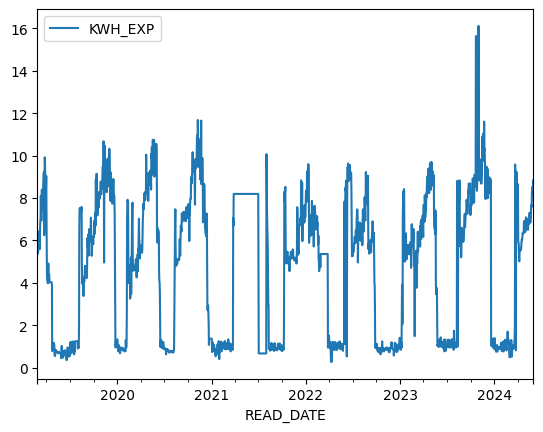

In [60]:
# resample menjadi 1 jam dan hitung rata-rata
df_daily = df_hourly.resample('1D').mean()
df_daily.to_csv('processed/442300169800_daily.csv')
df_daily.plot()

# 442400146024

In [43]:
df_5 = pd.read_csv('processed/442400146024_clean.csv')

In [44]:
df_5.shape

(152581, 23)

In [45]:
df_5.columns

Index(['ID', 'REF_NUMBER', 'LOCATION_CODE', 'SITE_CODE', 'METER_CODE',
       'PERIODE', 'READ_DATE', 'VOLTAGE_L1', 'VOLTAGE_L2', 'VOLTAGE_L3',
       'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'POWER_FACTOR_TOTAL',
       'ACTIVE_POWER_TOTAL', 'REACTIVE_POWER_TOTAL', 'KWH_EXPORT_TOTAL',
       'KWH_IMPORT_TOTAL', 'KVARH_EXPORT_TOTAL', 'KVARH_IMPORT_TOTAL',
       'INSERT_BY', 'INSERT_DATE', 'DATE_READ'],
      dtype='object')

In [46]:
# rumus KWH EXP =-((voltage A*current A)+(voltage A*current B)+(voltage A*current C))*power faktor*15/60
df_5['KWH_EXP'] = abs(((df_5['VOLTAGE_L1']*df_5['CURRENT_L1'])+(df_5['VOLTAGE_L1']*df_5['CURRENT_L2'])+(df_5['VOLTAGE_L1']*df_5['CURRENT_L3']))*df_5['POWER_FACTOR_TOTAL']*15/60)

# bandingkan KWH EXP dengan KWH EXP TOTAL
df_5[['KWH_EXP','KWH_EXPORT_TOTAL']]

,KWH_EXP,KWH_EXPORT_TOTAL
0,0.000000,1
1,0.000000,0
2,0.000000,0
3,0.000000,1
4,0.000000,0
...,...,...
152576,36.611443,36
152577,36.674043,37
152578,36.707886,36
152579,36.633141,37


In [47]:
df_5['KWH_EXP'].describe()

count    152581.000000
mean         43.569406
std          26.915946
min           0.000000
25%          21.972657
50%          39.205830
75%          67.078830
max         108.808889
Name: KWH_EXP, dtype: float64

<Axes: >

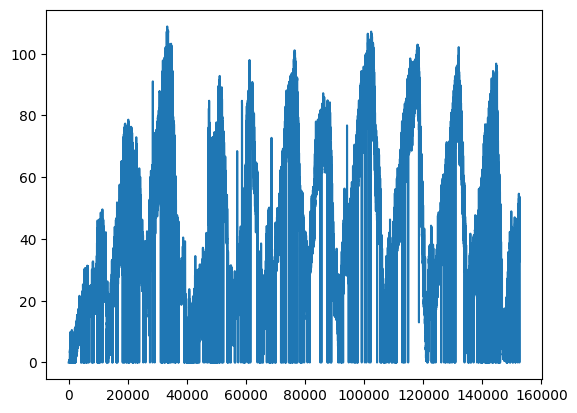

In [48]:
df_5['KWH_EXP'].plot()

In [49]:
# cek kembali data tahun 2024
df_raw = pd.read_csv('processed/442400146024_clean.csv')
df_raw['READ_DATE'] = pd.to_datetime(df_raw['READ_DATE'])
df_2024 = df_raw[df_raw['READ_DATE'].dt.year == 2024]
df_2024

,ID,REF_NUMBER,LOCATION_CODE,SITE_CODE,METER_CODE,PERIODE,READ_DATE,VOLTAGE_L1,VOLTAGE_L2,VOLTAGE_L3,...,POWER_FACTOR_TOTAL,ACTIVE_POWER_TOTAL,REACTIVE_POWER_TOTAL,KWH_EXPORT_TOTAL,KWH_IMPORT_TOTAL,KVARH_EXPORT_TOTAL,KVARH_IMPORT_TOTAL,INSERT_BY,INSERT_DATE,DATE_READ
138775,45078888011,4c0e1f6d96b4059ce4837414de8801b3,442400146024,44240,218172332,202401,2024-01-01 00:00:00,56.136642,56.239708,56.428660,...,-0.98877,129.33168,17.017326,33,0,5,0,HES,2024-01-02 07:47:46,20240101
138776,45078898298,4c0e1f6d96b4059ce4837414de8801b3,442400146024,44240,218172332,202401,2024-01-01 00:15:00,56.153820,56.256886,56.411484,...,-0.98877,129.33168,15.315594,33,0,4,0,HES,2024-01-02 07:48:22,20240101
138777,45078896619,4c0e1f6d96b4059ce4837414de8801b3,442400146024,44240,218172332,202401,2024-01-01 00:30:00,56.170998,56.274063,56.411484,...,-0.98877,129.33168,15.315594,32,0,4,0,HES,2024-01-02 07:50:03,20240101
138778,45078891194,4c0e1f6d96b4059ce4837414de8801b3,442400146024,44240,218172332,202401,2024-01-01 00:45:00,56.205353,56.291240,56.445840,...,-0.98877,129.33168,15.315594,33,0,4,0,HES,2024-01-02 07:50:03,20240101
138779,45078898599,4c0e1f6d96b4059ce4837414de8801b3,442400146024,44240,218172332,202401,2024-01-01 01:00:00,56.222530,56.308420,56.463017,...,-0.98877,129.33168,15.315594,33,0,4,0,HES,2024-01-02 07:50:03,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152576,51942900272,D5677D76DA9A72CE093BBB472A68E147,442400146024,44240,218172332,202405,2024-05-31 22:45:00,55.844620,55.947690,56.445840,...,-0.98877,142.94554,17.017326,36,0,4,0,HES,2024-08-10 01:24:57,20240531
152577,51942897575,D5677D76DA9A72CE093BBB472A68E147,442400146024,44240,218172332,202405,2024-05-31 23:00:00,55.844620,55.999220,56.463017,...,-0.98877,144.64728,17.017326,37,0,5,0,HES,2024-08-10 01:24:57,20240531
152578,51942899662,D5677D76DA9A72CE093BBB472A68E147,442400146024,44240,218172332,202405,2024-05-31 23:15:00,55.896152,55.999220,56.497370,...,-0.98877,144.64728,17.017326,36,0,4,0,HES,2024-08-10 01:24:57,20240531
152579,51942898367,D5677D76DA9A72CE093BBB472A68E147,442400146024,44240,218172332,202405,2024-05-31 23:30:00,55.861797,55.982044,56.463017,...,-0.98877,144.64728,17.017326,37,0,4,0,HES,2024-08-10 01:24:57,20240531


In [50]:
# buat dataframe baru yang hanya berisi READ_DATE dan KWH_EXP
df = df_5[['READ_DATE','KWH_EXP']]

# convert READ_DATE to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE',inplace=True)

df.to_csv('processed/442400146024_standard.csv')

/tmp/ipykernel_3361/1970911904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])


### Resample Hourly

<Axes: xlabel='READ_DATE'>

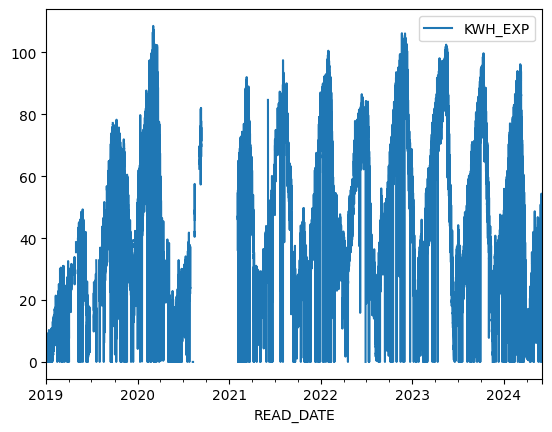

In [51]:
# resample menjadi 1 jam dan hitung rata-rata
df_hourly = df.resample('1h').mean()
df_hourly.plot()

/tmp/ipykernel_3361/1719920148.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill',inplace=True)


<Axes: xlabel='READ_DATE'>

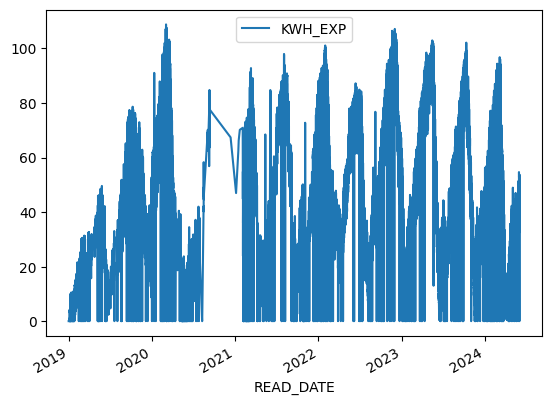

In [52]:
# fillna untuk mengisi nilai NaN
df_hourly.fillna(method='ffill',inplace=True)
# df.interpolate(method='linear',inplace=True)
df_hourly.to_csv('processed/442400146024_hourly.csv')
df.plot()

In [53]:
df_hourly

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.000000
2019-01-01 02:00:00,0.000000
2019-01-01 03:00:00,0.000000
2019-01-01 04:00:00,0.000000
...,...
2024-05-31 19:00:00,35.941667
2024-05-31 20:00:00,35.550374
2024-05-31 21:00:00,35.983031


<Axes: xlabel='READ_DATE'>

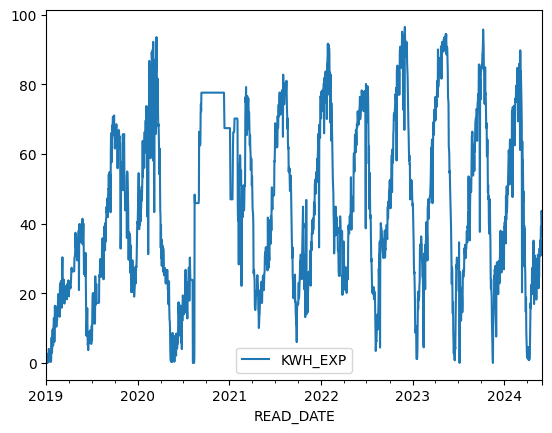

In [55]:
# resample menjadi 1 jam dan hitung rata-rata
df_daily = df_hourly.resample('1D').mean()
df_daily.to_csv('processed/442400146024_daily.csv')
df_daily.plot()